In [1]:
#jupyter nbconvert file.ipynb --toslides --post serve

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import os, cv2
import sys
import math

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

import h5py
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
%matplotlib inline

C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2. Data preparation.
Access files in file directory, and convert images to matrix containing pixel RGB values

In [2]:
# Declaring img rows and cols (pixels)

img_rows= 128
img_cols= 128
num_channel= 3

# Get current directory

PATH = os.getcwd()
print(PATH)

C:\Users\Jeryl\Documents\Capstone\20180305 Capstone


## Image augmentation
Using the image generator from keras, to do random transformations to images. This effectively increases number of images per label to a level that is defined (in our case 1000 images).

In [7]:
# Define data path

data_path = os.path.join(PATH, 'datasets', 'invitrojpg')  # Insert augment folder here
data_dir_list = os.listdir(data_path)

# Construct data dictionary of training dataset 

directory=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    for img in img_list:
        directory.append(int(dataset))

In [9]:
# Image augmentation
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

class_size=300

In [10]:
# Specify source and destination paths for image generation
src_train_dir= os.path.join(PATH,'datasets', 'insitujpg')
dest_train_dir= os.path.join(PATH,'datasets', 'augment')


In [11]:
it = 0
# Use counts for individual values, generate enough images till it hits roughly 1000
for count in label_counts.values:
    #nb of generations per image for this class label in order to make it size ~= class_size
    ratio=math.floor(class_size/count)-1
    print(count,count*(ratio+1))
    dest_lab_dir=os.path.join(dest_train_dir,str(label_counts.index[it]))
    src_lab_dir=os.path.join(src_train_dir,str(label_counts.index[it]))
    if not os.path.exists(dest_lab_dir):
        os.makedirs(dest_lab_dir)
    for file in os.listdir(src_lab_dir):
        img=load_img(os.path.join(src_lab_dir,file))
        #img.save(os.path.join(dest_lab_dir,file))
        x=img_to_array(img) 
        x=x.reshape((1,) + x.shape)
        i=0
        for batch in datagen.flow(x, batch_size=1,save_to_dir=dest_lab_dir, save_format='jpg'):
            i+=1
            if i > ratio:
                break 
    it=it+1

8 296
7 294
7 294
7 294
7 294
6 300
6 300
5 300
5 300
5 300
4 300
4 300
3 300
3 300
3 300
2 300
2 300


In [6]:
# Check distribution of labels after augmentation
aug_label = []

data_path = os.path.join(PATH,'datasets', 'conf')
data_dir_list = os.listdir(data_path)

# Construct data dictionary of training dataset 
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    for img in img_list:
        aug_label.append(int(dataset))

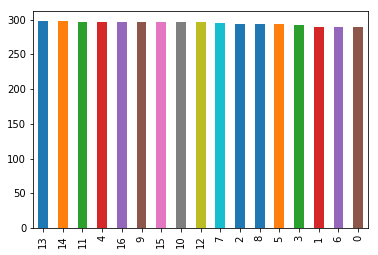

In [15]:
augcount = pd.DataFrame(aug_label)
augcount[0].value_counts().plot(kind='bar')

## Reading images into 128 by 128 matrix
Use cv2.imread to convert pixel values into 0 to 255, then divide by 255 to normalise the pixel values.

In [2]:
PATH = os.getcwd()
data_path = os.path.join(PATH,'datasets', 'conf')
data_dir_list = os.listdir(data_path)

In [3]:
# Training dataset
# Read image using cv2, then append matrix to list

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-10

Loaded the images of dataset-11

Loaded the images of dataset-12

Loaded the images of dataset-13

Loaded the images of dataset-14

Loaded the images of dataset-15

Loaded the images of dataset-16

Loaded the images of dataset-2

Loaded the images of dataset-3

Loaded the images of dataset-4

Loaded the images of dataset-5

Loaded the images of dataset-6

Loaded the images of dataset-7

Loaded the images of dataset-8

Loaded the images of dataset-9



In [4]:
# Make matrix into arrays

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(86, 128, 128, 3)


In [5]:
# Pickle X
pickle_out = open('X_conf','wb')
pickle.dump(img_data, pickle_out)
pickle_out.close()

del img_data


In [8]:
len(aug_label)

86

In [9]:
ylab = np.array(aug_label)
ylab = ylab.astype('int8')

# Pickle y_train
pickle_out = open('y_conf','wb')
pickle.dump(ylab, pickle_out)
pickle_out.close()

del ylab
